<a href="https://colab.research.google.com/github/kmayutrisna/MLCrashCourse/blob/main/Linear_Regression_with_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression with Synthetic Data**

Pada colab ini, kita akan melakukan eksplorasi linear regression dengan database yang sederhana.

# Learning objectives:
Setelah mengerjakan latihan, kita akan mengetahui beberapa poin ini:
Menjalankan colab



  *   Menyesuaikan hyperparameters berikut:
    *   learning rate
*   number of epoch
    *   batch size


*   Menginterpretasikan beberapa jenis kurva loss



# **Gunakan versi yang tepat dari tensorflow**
Code berikut ini digunakan untuk memastikan bahwa Colab akan berjalan pada TensorFlow 2.X yang merupakan versi terakhir

In [10]:
#@title Run this Colab on TensorFlow 2.x
%tensorflow_version 2.x

# **Import relevant module**
Kode berikut digunakan untuk mengimport paket yang diperlukan

In [11]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# **Define function that build and train a model**
Kode berikut mendefinisikan dua fungsi:



*   `build_model(my_learning rate)`, yang membangun model yang kosong
*   `train_model(model, feature, label, epochs)`, yang melatih model dari examples (feature dan label)




In [12]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


# **Define plotting functions**
Kita akan menggunakan popular Python library yang disebut dengan Matplotlib untuk membuat dua plot berikut:



*   plot dari feature values vs. label values, dan sebuah garis yang menunjukkan output dari trained model
*   loss curve



In [13]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


# **Define the dataset**
Dataset terdiri dari 12 examples. Setiap examples terdiri dari satu feature dan satu label

In [14]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

# **Specify the hyperparameters**
Hyperparameters pada Colab ini adalah:


*   learning rate
*   epochs


*   batch size

Kode berikut menginisialisasikan hypermarameters tersebut dan kemudian memanggil fungsi yang membangun dan melatih model.





Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 248ms/step - loss: 151.5401 - root_mean_squared_error: 12.3102
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 145.2011 - root_mean_squared_error: 12.0499
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 140.7335 - root_mean_squared_error: 11.8631
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 137.0697 - root_mean_squared_error: 11.7077
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 133.8733 - root_mean_squared_error: 11.5704
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 130.9889 - root_mean_squared_error: 11.4450
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 128.3301 - root_mean_squared_error: 11.3283
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 125.8433 - root_mean_squared_error: 11.2180
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 123.4928 - root_mean_squar

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


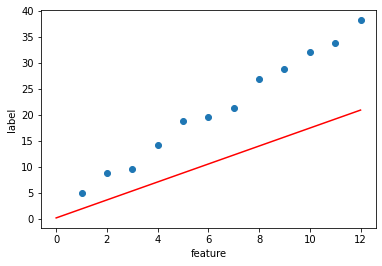

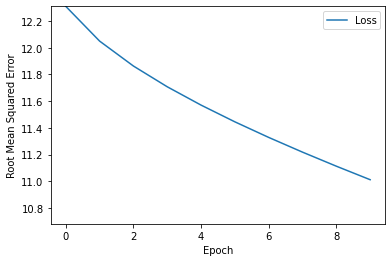

In [15]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# **Task 1: Examine the graph**
Examine graph yang pertama. Titik biru mengidentifikasikan data yang sebenarnya; garis merah mengidentifikasikan output dari trained model. Idealnya, garis merah harus mendekati titik biru.

Sejumlah nilai acak akan berperan dalam melatih model, jadi kita akan mendapatkan hasil yang berbeda setiap kali melakukan pelatihan. Yang dapat dikatakan garis merah mungkin saja tidak sejajar dengan titik biru.

Examine untuk graph kedua, yang menunjukkan loss curve. Perhatikan bahwa loss curve menurun tetapi tidak mendatar yang menunjukkan bahwa model tidak cukup mendapatkan pelatihan

# **Task 2:**
Melatih loss haruslah berkurang secara bertahap, pada awalnya berkurang secara drastis, dan kemudian melambat. Pada akhirnya, training loss haruslah tetap stabil (zero slop atau hampir zero slop), yang mengindikasikan bahwa training telah konvergen.

Pada Task 1, training loss tidak konvergen. Salah satu solusi yang mungkin dilakukan adalah untuk melatih lebih banyak epoch. Tugas kita disini adalah untuk meningkatkan jumlah epoch secukupnya agar model dapat konvergen. Tetapi, tidaklah efesien jika melatih yang sudah konvergen, jadi jangan hanya mengatur jumlah epoch untuk nilai yang lebih tinggi. Periksa loss curve apakah modelnya sudah konvergen?

Epoch 1/450


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 241ms/step - loss: 142.2513 - root_mean_squared_error: 11.9269
Epoch 2/450
1/1 [==============================] - 0s 10ms/step - loss: 136.1134 - root_mean_squared_error: 11.6668
Epoch 3/450
1/1 [==============================] - 0s 7ms/step - loss: 131.7916 - root_mean_squared_error: 11.4801
Epoch 4/450
1/1 [==============================] - 0s 13ms/step - loss: 128.2500 - root_mean_squared_error: 11.3247
Epoch 5/450
1/1 [==============================] - 0s 7ms/step - loss: 125.1619 - root_mean_squared_error: 11.1876
Epoch 6/450
1/1 [==============================] - 0s 8ms/step - loss: 122.3767 - root_mean_squared_error: 11.0624
Epoch 7/450
1/1 [==============================] - 0s 9ms/step - loss: 119.8106 - root_mean_squared_error: 10.9458
Epoch 8/450
1/1 [==============================] - 0s 9ms/step - loss: 117.4117 - root_mean_squared_error: 10.8357
Epoch 9/450
1/1 [==============================] - 0s 10ms/step - loss: 115.1451 - root_

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


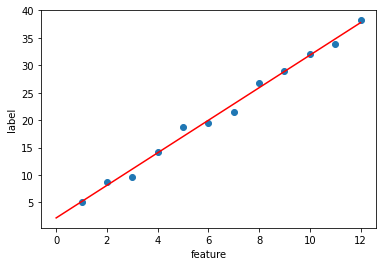

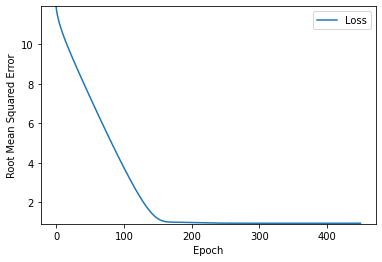

In [16]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

# **Task 3: Increase the learning rate**
Pada task 2, kita meningkatkan jumlah epoch untuk mendapatkan model yang konvergen. Sementara, kita dapat mendapatkan model konvergen yang lebih cepat dengan meningkatkan nilai learning rate. Tetapi, mengatur nilai learning rate terlalu tinggi terkadang membuat model tidak konvergen. Pada task 3, kita akan sengaja mengatur learning rate terlalu tinggi. Jalankan kode dibawah ini:

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 235ms/step - loss: 802.3979 - root_mean_squared_error: 28.3266
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 6669665.5000 - root_mean_squared_error: 2582.5696
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 794.4321 - root_mean_squared_error: 28.1857
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 4.6045 - root_mean_squared_error: 2.1458
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 1.2324 - root_mean_squared_error: 1.1102
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 1.1639 - root_mean_squared_error: 1.0788
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 1.1438 - root_mean_squared_error: 1.0695
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 1.1255 - root_mean_squared_error: 1.0609
Epoch 9/500
1/1 [==============================] - 0s 13ms/step - loss: 1.1076 - root_mean_squared_

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


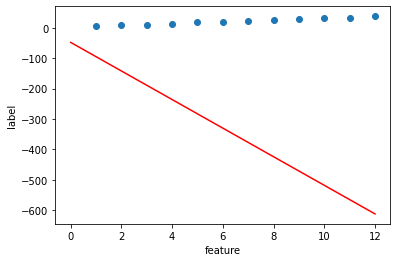

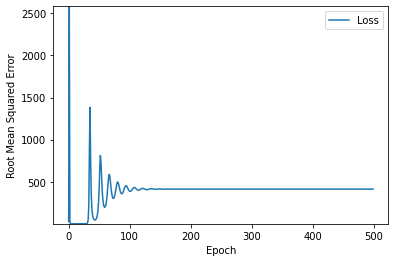

In [17]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Dapat dilihat bahwa hasilnya sangat buruk

# **Task 5: Adjust the batch size**
Sistem akan menghitung ulang loss value dari model dan mengurangi weight dan bias dari model setelah beberapa iterasi. Setiap iterasi adalah rentang dimana sistem memproses satu batch. Contoh, jika batch size 6, maka sistem menghitung ulang loss value dan mengurangi weight dan bias setelah proses pada setiap 6 examples.

Satu epoch mencakup iterasi yang cukup untuk memproses setiap example pada dataset. Contoh, jika batch size adalah 12, maka setiap epoch berlangsung satu iterasi. Namun, jika batch size 6, maka setiap epoch menggunakan dua iterasi.

Sangat mudah untuk mengatur batch size ke jumlah example pada dataset (12 pada kasus ini). Tetapi, model mungkin saja melakukan proses train lebih cepat pada ukuran batch yang lebih kecil. Sebaliknya, batch yang sangat kecil mungkin tidak cukup memberikan informasi untuk membantu model menjadi konvergen.

Percobaan dengan menggunakan batch size kode berikut. Berapakah nilai paling kecil yang dapat diatur untuk batch size dan apakah model masih konvergen dalam ratusan epoch?

Epoch 1/125


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


12/12 [==============================] - 0s 2ms/step - loss: 781.4346 - root_mean_squared_error: 27.9542
Epoch 2/125
12/12 [==============================] - 0s 2ms/step - loss: 555.0522 - root_mean_squared_error: 23.5595
Epoch 3/125
12/12 [==============================] - 0s 2ms/step - loss: 397.9846 - root_mean_squared_error: 19.9496
Epoch 4/125
12/12 [==============================] - 0s 2ms/step - loss: 274.8122 - root_mean_squared_error: 16.5775
Epoch 5/125
12/12 [==============================] - 0s 2ms/step - loss: 177.1927 - root_mean_squared_error: 13.3114
Epoch 6/125
12/12 [==============================] - 0s 2ms/step - loss: 104.3157 - root_mean_squared_error: 10.2135
Epoch 7/125
12/12 [==============================] - 0s 2ms/step - loss: 54.4575 - root_mean_squared_error: 7.3795
Epoch 8/125
12/12 [==============================] - 0s 2ms/step - loss: 23.6019 - root_mean_squared_error: 4.8582
Epoch 9/125
12/12 [==============================] - 0s 2ms/step - loss: 7.8354 

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


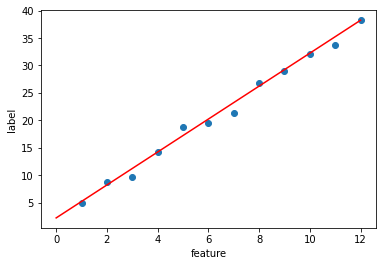

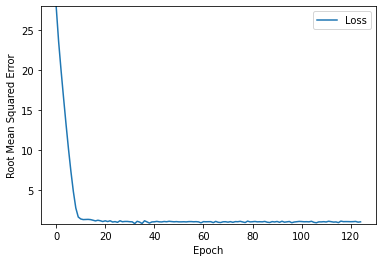

In [18]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# **Summary of hyperparameter tuning**

Permasalahan machine learning membutuhkan banyak pengaturan hyperparameter. Sayangnya, kita tidak dapat menyediakan aturan untuk pengaturan hyperparameter untuk setiap model. Menurunkan learning rate dapat membantu satu model menjadi konvergen dengan cepat tetapi membuat model lainnya sangat lamban menjadi konvergen. Kita harus melakukan percobaan untuk mencari hyperparameter terbaik untuk dataset yang kita gunakan. Berikut ini adalah beberapa aturan praktisnya:


*   Training terhadap loss haruslah mengalami penurunan secara stabil, secara cepat pada awalnya, dan melambat kemudian sampai slope pada curve mencapai atau mendekati zero.
*   Jika training loss tidak konvergen, lakukan lebih banyak ephocs.


*   Jika training loss menurun terlalu lamban, naikkan learning rate. Perlu diingat bahwa pengaturan learning rate yang terlalu tinggi mungkin dapat menghalangi konvergensi.
*   Jika training loss sangat bervariasi (training loss bernilai acak), turunkan nilai learning rate.


*   Menurunkan learning rate selama meningkatkan jumlah epochs dari batch size merupakan kombinasi yang baik.
*   Mengatur ukuran batch ke ukuran yang sangat kecil juga dapat menyebabkan ketidakstabilan. Pertama, coba gunakan batch size yang besar. Kemudian, turunkan batch size sampai melihat degradasi.


*   Untuk real-world dataset yang terdiri dari jumalh examples yang sangat besar, keseluruhan dataset mungkin saja tidak cukup ke dalam memori. Dalam kasus ini, kita harus mengurangi batch size untuk membuat batch sesuai dengan memori.

Remeber: kombinasi yang ideal dari hyperparameter adalah data yang dependent, jadi kita harus selalu melakukan percobaan dan verifikasi.







